# Bitcoin Price Prediction using ARIMA Model
---
### By:<br>
### Vedant Dawange <br>
### Uddhav Patil


---



## Installing Yahoo Finance To get BTC Prices

In [ ]:
pip install yfinance

##Importing Data set

In [ ]:
#Importing Dataset
import yfinance as yf
df=yf.download('BTC-USD')

In [ ]:
#dataset
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-04-22,40525.863281,40777.757812,39315.417969,39740.320312,39740.320312,28011716745
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249
2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,39469.292969,17964398167


In [ ]:
len(df)

2779

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2779 entries, 2014-09-17 to 2022-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2779 non-null   float64
 1   High       2779 non-null   float64
 2   Low        2779 non-null   float64
 3   Close      2779 non-null   float64
 4   Adj Close  2779 non-null   float64
 5   Volume     2779 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 152.0 KB


In [ ]:
#describe() function gives descriptive statistics of data set for numeric variable
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2.779000e+03
mean,12028.098095,12344.802593,11680.373071,12040.818533,12040.818533,1.499490e+10
std,16570.437482,17003.064648,16076.716895,16573.893072,16573.893072,1.989366e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,611.510010,614.890991,608.996002,612.321991,612.321991,8.276570e+07
50%,6437.319336,6540.209961,6334.459961,6446.470215,6446.470215,5.332719e+09
75%,10956.277832,11301.309570,10644.647461,10960.592285,10960.592285,2.539922e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


##Importing Libraries

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


##Visualising Dataset

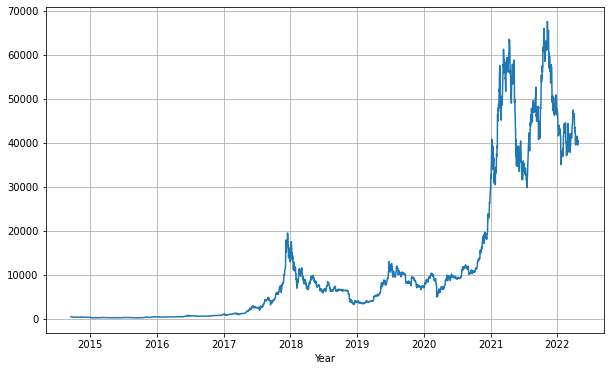

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')

plt.plot(df.index, df['Adj Close'])
plt.show()

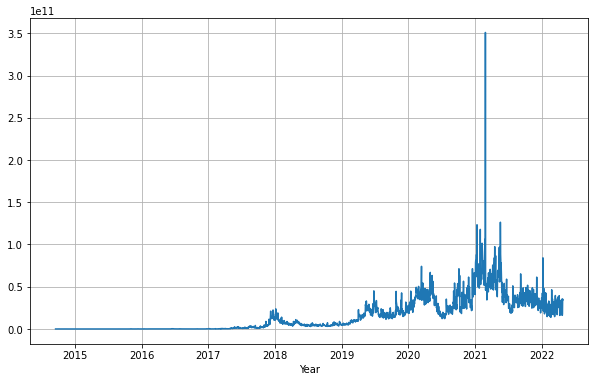

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')

plt.plot(df.index, df['Volume'])
plt.show()

##Train Test Splitting

In [ ]:
 # Train test split 
to_row = int(len(df)*0.9)  #90% of data will be used to train the dataset
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

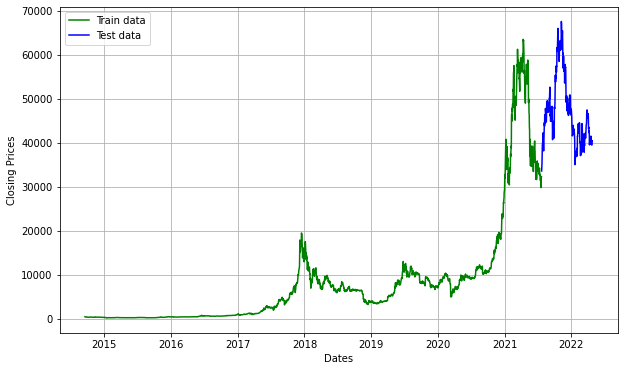

In [ ]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot (df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()


In [ ]:
model_predictions= []
n_test_obser=len(testing_data)


In [ ]:
for i in range(n_test_obser):
  model= ARIMA(training_data, order=(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)


In [ ]:
print('Expected Value of BTC Tomorrow(USD): ',yhat)

Expected Value of BTC Tomorrow(USD):  40420.275693709475


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2777
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22473.639
Method:                       css-mle   S.D. of innovations            791.426
Date:                Tue, 26 Apr 2022   AIC                          44959.279
Time:                        02:49:20   BIC                          44994.853
Sample:                             1   HQIC                         44972.125
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4044     15.264      0.944      0.345     -15.513      44.322
ar.L1.D.y     -0.0236      0.019     -1.245      0.213      -0.061       0.014
ar.L2.D.y     -0.0054      0.019     -0.286      0.7

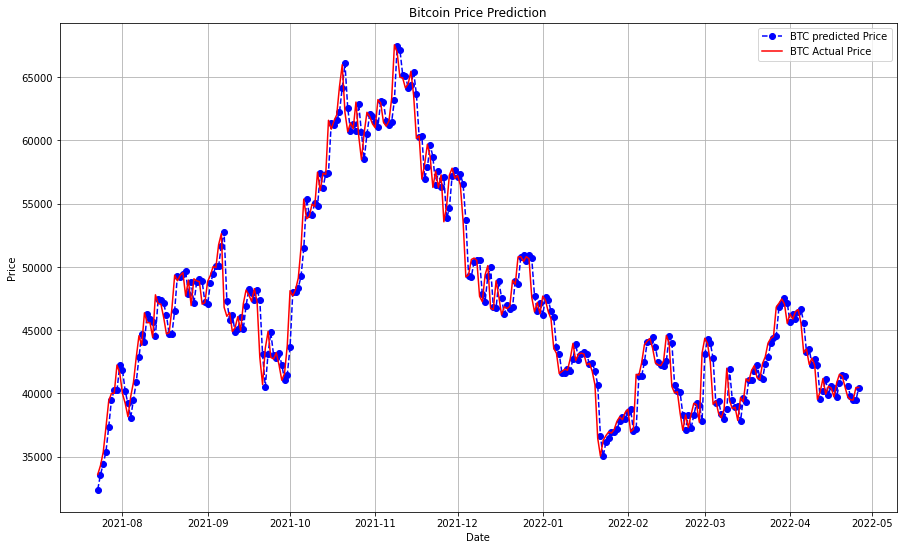

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot (date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
 # report performance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) #Mean Absolute Percentage Error
# Around 2.5% MAPE (Mean Absolute Percentage Error) implies the model is about 97.5 % accurate in predicting the test set observations.

MAPE: 0.025231171010710818


In [ ]:
print('Accuracy:',(100-(mape*100)))

Accuracy: 97.47688289892892
